# I.	Data information

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder,PowerTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
import pandas as pd

df = pd.read_csv("obesity_level.csv")

In [ ]:
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,0be1dad
0,0,Male,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,Sometimes,0,2.763573,0,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,Frequently,0,2.000000,0,1.000000,1.000000,0,Automobile,0rmal_Weight
2,2,Female,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,Sometimes,0,1.910378,0,0.866045,1.673584,0,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,Sometimes,0,1.674061,0,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,Sometimes,0,1.979848,0,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
df.describe()

,id,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,SCC,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,0.819636,0.914443,2.445908,2.761332,0.011803,2.029418,0.033096,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.384500,0.279716,0.533218,0.705375,0.108000,0.608467,0.178891,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,1.000000,1.000000,2.000000,3.000000,0.000000,1.792022,0.000000,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,1.000000,1.000000,2.393837,3.000000,0.000000,2.000000,0.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,1.000000,1.000000,3.000000,3.000000,0.000000,2.549617,0.000000,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,1.000000,1.000000,3.000000,4.000000,1.000000,3.000000,1.000000,3.000000,2.000000


In [ ]:
columns=['Gender','family_history_with_overweight','FAVC','SMOKE','SCC']
df=pd.get_dummies(df,columns=columns,drop_first=True,dtype=int)

In [ ]:
le=LabelEncoder()
a=['CAEC','CALC','MTRANS']
for i in a:
    df[i]=le.fit_transform(df[i])


In [ ]:
df.head()

,id,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,MTRANS,0be1dad,Gender_Male,family_history_with_overweight_1,FAVC_1,SMOKE_1,SCC_1
0,0,24.443011,1.699998,81.669950,2.000000,2.983297,3,2.763573,0.000000,0.976473,2,3,Overweight_Level_II,1,1,1,0,0
1,1,18.000000,1.560000,57.000000,2.000000,3.000000,2,2.000000,1.000000,1.000000,0,0,0rmal_Weight,0,1,1,0,0
2,2,18.000000,1.711460,50.165754,1.880534,1.411685,3,1.910378,0.866045,1.673584,0,3,Insufficient_Weight,0,1,1,0,0
3,3,20.952737,1.710730,131.274851,3.000000,3.000000,3,1.674061,1.467863,0.780199,2,3,Obesity_Type_III,0,1,1,0,0
4,4,31.641081,1.914186,93.798055,2.679664,1.971472,3,1.979848,1.967973,0.931721,2,3,Overweight_Level_II,1,1,1,0,0


In [ ]:
from sklearn.model_selection import train_test_split
train_test, validation_data = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
train, test = train_test_split(train_test, test_size=0.2, random_state=42)

In [ ]:
pt = PowerTransformer(method='yeo-johnson')
train_features = train.drop('0be1dad', axis=1)
train_features_scaled = pt.fit_transform(train_features)
train_scaled = pd.DataFrame(train_features_scaled, columns=train_features.columns)

In [ ]:
test_features = test.drop('0be1dad', axis=1)
test_features_scaled = pt.transform(test_features)
test_scaled = pd.DataFrame(test_features_scaled, columns=test_features.columns)

In [ ]:
val_features = validation_data.drop('0be1dad', axis=1)
val_features_scaled = pt.transform(val_features)
val_scaled = pd.DataFrame(val_features_scaled, columns=val_features.columns)

In [ ]:
train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13284 entries, 0 to 13283
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                13284 non-null  float64
 1   Age                               13284 non-null  float64
 2   Height                            13284 non-null  float64
 3   Weight                            13284 non-null  float64
 4   FCVC                              13284 non-null  float64
 5   NCP                               13284 non-null  float64
 6   CAEC                              13284 non-null  float64
 7   CH2O                              13284 non-null  float64
 8   FAF                               13284 non-null  float64
 9   TUE                               13284 non-null  float64
 10  CALC                              13284 non-null  float64
 11  MTRANS                            13284 non-null  float64
 12  Gend

In [ ]:
train2 = train_scaled.copy()
train.reset_index(drop=True, inplace=True)
train2.reset_index(drop=True, inplace=True)
train2['target'] = train['0be1dad']
train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13284 entries, 0 to 13283
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                13284 non-null  float64
 1   Age                               13284 non-null  float64
 2   Height                            13284 non-null  float64
 3   Weight                            13284 non-null  float64
 4   FCVC                              13284 non-null  float64
 5   NCP                               13284 non-null  float64
 6   CAEC                              13284 non-null  float64
 7   CH2O                              13284 non-null  float64
 8   FAF                               13284 non-null  float64
 9   TUE                               13284 non-null  float64
 10  CALC                              13284 non-null  float64
 11  MTRANS                            13284 non-null  float64
 12  Gend

In [ ]:
test2 = test_scaled.copy()
test.reset_index(drop=True, inplace=True)
test2.reset_index(drop=True, inplace=True)
test2['target'] = test['0be1dad']
test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3322 non-null   float64
 1   Age                               3322 non-null   float64
 2   Height                            3322 non-null   float64
 3   Weight                            3322 non-null   float64
 4   FCVC                              3322 non-null   float64
 5   NCP                               3322 non-null   float64
 6   CAEC                              3322 non-null   float64
 7   CH2O                              3322 non-null   float64
 8   FAF                               3322 non-null   float64
 9   TUE                               3322 non-null   float64
 10  CALC                              3322 non-null   float64
 11  MTRANS                            3322 non-null   float64
 12  Gender

In [ ]:
val2 = val_scaled.copy()
validation_data.reset_index(drop=True, inplace=True)
val2.reset_index(drop=True, inplace=True)
val2['target'] = validation_data['0be1dad']
val2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4152 entries, 0 to 4151
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                4152 non-null   float64
 1   Age                               4152 non-null   float64
 2   Height                            4152 non-null   float64
 3   Weight                            4152 non-null   float64
 4   FCVC                              4152 non-null   float64
 5   NCP                               4152 non-null   float64
 6   CAEC                              4152 non-null   float64
 7   CH2O                              4152 non-null   float64
 8   FAF                               4152 non-null   float64
 9   TUE                               4152 non-null   float64
 10  CALC                              4152 non-null   float64
 11  MTRANS                            4152 non-null   float64
 12  Gender

In [ ]:
def remove_outliers(data, categorical_columns):
    # Separate numerical and categorical data
    numerical_data = data.drop(columns=categorical_columns)
    categorical_data = data[categorical_columns]

    # Calculate IQR for numerical data
    Q1 = numerical_data.quantile(0.25)
    Q3 = numerical_data.quantile(0.75)
    IQR = Q3 - Q1

    # Identify outliers
    mask = ~((numerical_data < (Q1 - 1.5 * IQR)) | (numerical_data > (Q3 + 1.5 * IQR))).any(axis=1)

    # Keep only rows without outliers
    filtered_data = numerical_data[mask]
    filtered_categorical_data = categorical_data[mask]

    # Combine numerical and categorical data back
    return pd.concat([filtered_data, filtered_categorical_data], axis=1)

# Example usage
categorical_columns = ['target']  # Replace 'class' with the name of your categorical column(s)
train_2 = remove_outliers(train2, categorical_columns)
test_2 = remove_outliers(test2, categorical_columns)
val_2 = remove_outliers(val2, categorical_columns)


In [ ]:
b=['id']
for i in b:
    train_2=train_2.drop(i,axis=1)
    test_2=test_2.drop(i,axis=1)
    val_2=val_2.drop(i,axis=1)

In [ ]:
train_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5370 entries, 1 to 13282
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               5370 non-null   float64
 1   Height                            5370 non-null   float64
 2   Weight                            5370 non-null   float64
 3   FCVC                              5370 non-null   float64
 4   NCP                               5370 non-null   float64
 5   CAEC                              5370 non-null   float64
 6   CH2O                              5370 non-null   float64
 7   FAF                               5370 non-null   float64
 8   TUE                               5370 non-null   float64
 9   CALC                              5370 non-null   float64
 10  MTRANS                            5370 non-null   float64
 11  Gender_Male                       5370 non-null   float64
 12  family_his

In [ ]:
mapping = {
    'Overweight_Level_II': 'OvlII',
    '0rmal_Weight': 'Normal',
    'Insufficient_Weight': 'Insuff',
    'Obesity_Type_III': 'ObIII',
    'Obesity_Type_II': 'ObII',
    'Overweight_Level_I': 'OvlI',
    'Obesity_Type_I': 'ObI'
}

train_2['target'] = train_2['target'].map(mapping)
test_2['target'] = test_2['target'].map(mapping)
val_2['target'] = val_2['target'].map(mapping)

In [ ]:
train_2.head()

,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,MTRANS,Gender_Male,family_history_with_overweight_1,FAVC_1,SMOKE_1,SCC_1,target
1,0.091645,-0.575820,-1.061597,1.076018,0.219021,0.429745,-0.089303,-1.325263,-1.163837,0.612931,0.365951,-1.004678,0.465038,0.304621,-0.109009,-0.187467,Normal
2,0.228581,-0.358227,1.003889,1.076018,0.219021,0.429745,0.569622,-0.977079,0.363640,0.612931,0.365951,-1.004678,0.465038,0.304621,-0.109009,-0.187467,ObIII
5,1.198329,0.227593,-0.726184,-0.881962,0.219021,0.429745,-1.640741,0.190776,0.813084,-1.672557,0.365951,0.995344,0.465038,0.304621,-0.109009,-0.187467,Normal
9,-0.687833,-0.575820,0.675148,-0.881962,0.219021,0.429745,1.669970,1.164813,-1.163837,-1.672557,0.365951,0.995344,0.465038,0.304621,-0.109009,-0.187467,ObI
11,-0.397596,0.570943,-0.247759,-0.881962,0.219021,0.429745,-0.089303,1.164813,0.813084,0.612931,0.365951,0.995344,0.465038,0.304621,-0.109009,-0.187467,OvlII


In [ ]:
train, test = train_test_split(train_2, test_size=0.2, random_state=42)

                             Feature  Importance
2                             Weight    0.320472
3                               FCVC    0.158252
11                       Gender_Male    0.132639
0                                Age    0.102682
1                             Height    0.087348
8                                TUE    0.077958
7                                FAF    0.049743
6                               CH2O    0.041367
9                               CALC    0.029539
4                                NCP    0.000000
5                               CAEC    0.000000
10                            MTRANS    0.000000
12  family_history_with_overweight_1    0.000000
13                            FAVC_1    0.000000
14                           SMOKE_1    0.000000
15                             SCC_1    0.000000


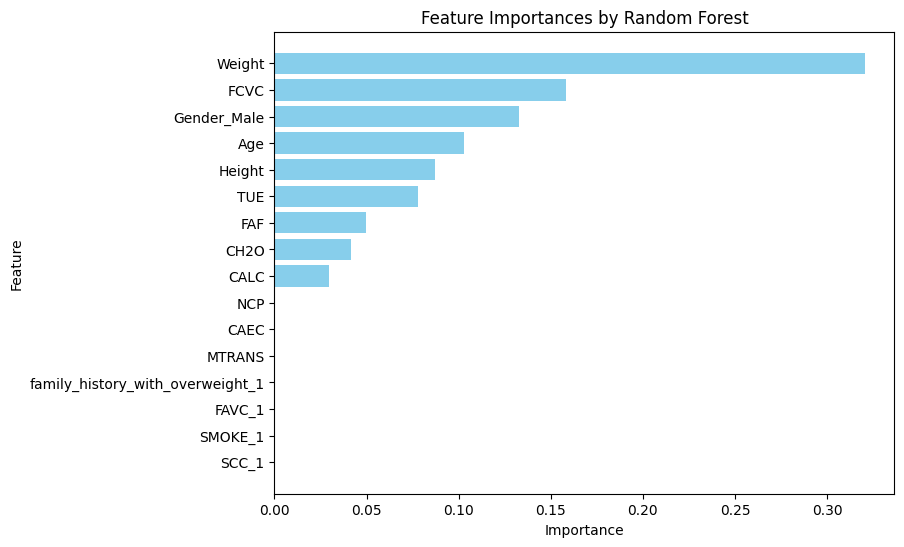

In [ ]:
X = train.drop('target', axis=1)
y = train['target']
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

# Extract feature importances
importances = rf_model.feature_importances_

# Create a DataFrame to visualize feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print the DataFrame
print(feature_importance_df)

# (Optional) Visualize feature importances with a bar plot
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances by Random Forest')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# prompt: label encoding train_2[target]

from sklearn.preprocessing import LabelEncoder

# Assuming 'train_2' is already defined and processed as in the provided code.
le = LabelEncoder()
t = train_2.copy()
t['target'] = le.fit_transform(t['target'])

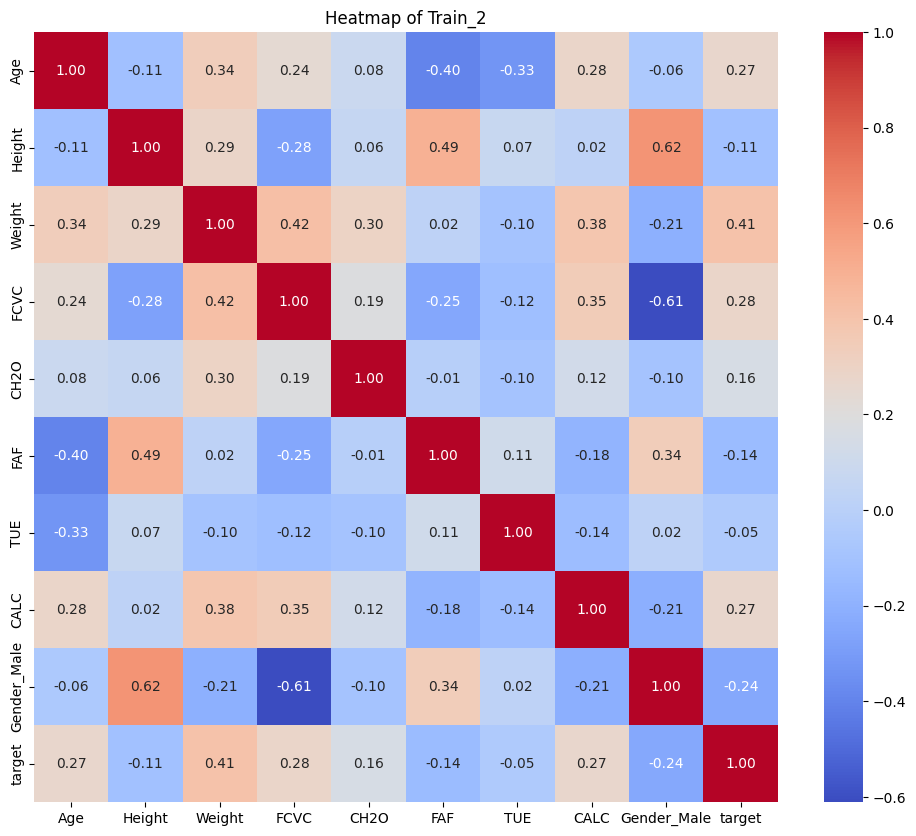

In [ ]:
# prompt: draw heat maps of train_2

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'train_2' is already defined and processed as in the provided code.

# Calculate the correlation matrix
correlation_matrix = t.corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Train_2')
plt.show()

In [ ]:
train_2.drop(columns=['CAEC', 'MTRANS', 'NCP', 'family_history_with_overweight_1', 'FAVC_1', 'SMOKE_1', 'SCC_1'], inplace=True)
test_2.drop(columns=['CAEC', 'MTRANS', 'NCP', 'family_history_with_overweight_1', 'FAVC_1', 'SMOKE_1', 'SCC_1'], inplace=True)
val_2.drop(columns=['CAEC', 'MTRANS', 'NCP', 'family_history_with_overweight_1', 'FAVC_1', 'SMOKE_1', 'SCC_1'], inplace=True)

In [ ]:
from scipy.io import arff
import pandas as pd

# Function to convert DataFrame to ARFF format and save
def save_to_arff(cleaned_df, filename, relation_name="data"):
    with open(filename, 'w') as f:
        # Write the ARFF header
        f.write(f"@relation {relation_name}\n\n")

        # Define attributes
        for col in cleaned_df.columns:
            f.write(f"@attribute {col} real\n")

        # Write the data section
        f.write("\n@data\n")
        for row in cleaned_df.values:
            f.write(",".join(map(str, row)) + "\n")


save_to_arff(train_2, 'train_data.arff', "Obesity_Risk_train_data")
save_to_arff(test_2, 'test_data.arff', "Obesity_Risk_test_data")
save_to_arff(val_2, 'val_data.arff', "Obesity_Risk_validation_data")


In [ ]:
# prompt: create ANN model

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Load the preprocessed data (assuming 'train_2' DataFrame is already created)
# ... (Your existing code to create 'train_2' DataFrame) ...

# Split the data into training and testing sets
X_train = train_2.drop('target', axis=1)
y_train = train_2['target']

X_test = test_2.drop('target', axis=1)
y_test = test_2['target']

# Create and train the ANN model
ann_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42) # Example architecture
ann_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ann_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Insuff       0.91      0.79      0.85        39
      Normal       0.83      0.86      0.85        86
         ObI       0.85      0.89      0.87       176
        ObII       0.95      0.96      0.96       221
       ObIII       1.00      1.00      1.00       671
        OvlI       0.66      0.62      0.64        76
       OvlII       0.69      0.68      0.68        77

    accuracy                           0.92      1346
   macro avg       0.84      0.83      0.83      1346
weighted avg       0.92      0.92      0.92      1346



In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score

# Assuming 'train_2' DataFrame is already created
# Split the data into features and target
X = train_2.drop('target', axis=1)
y = train_2['target']

# Define the ANN model
ann_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)  # 10-fold cross-validation
cv_scores = cross_val_score(ann_model, X, y, cv=kf, scoring='accuracy')

# Print the cross-validation results
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())
print("Standard Deviation of CV Accuracy:", cv_scores.std())

# Train the model on the entire training set for final evaluation on test set
ann_model.fit(X, y)

# Assuming test_2 DataFrame is already created
X_test = test_2.drop('target', axis=1)
y_test = test_2['target']

# Make predictions on the test set
y_pred = ann_model.predict(X_test)

# Evaluate the model on the test set
print("\nTest Set Classification Report:")
print(classification_report(y_test, y_pred))


Cross-Validation Accuracy Scores: [0.95530726 0.94599628 0.93854749 0.95344507 0.95344507 0.93482309
 0.94599628 0.94413408 0.95530726 0.95716946]
Mean CV Accuracy: 0.9484171322160149
Standard Deviation of CV Accuracy: 0.007310162542417332

Test Set Classification Report:
              precision    recall  f1-score   support

      Insuff       0.97      0.77      0.86        39
      Normal       0.81      0.92      0.86        86
         ObI       0.89      0.92      0.90       176
        ObII       0.96      0.97      0.97       221
       ObIII       1.00      1.00      1.00       671
        OvlI       0.80      0.67      0.73        76
       OvlII       0.78      0.79      0.79        77

    accuracy                           0.94      1346
   macro avg       0.89      0.86      0.87      1346
weighted avg       0.94      0.94      0.94      1346

